In [1]:
import cv2
import os
import numpy as np
import pydicom
import PIL
import glob
import skimage.io as io
import numpy as np
import pandas as pd
import pydicom.data
from pydicom.pixel_data_handlers.util import apply_voi_lut
import random
import skimage.io as io

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import glob
files = glob.glob("C:\\Users\\user\\Documents\\DATASET_PNG\\**\\*.png",recursive = True)


In [5]:
len(files)

6648

In [66]:
files

['C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10000.png',
 'C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10001.png',
 'C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10004.png',
 'C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10005.png',
 'C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10006.png',
 'C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10008.png',
 'C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10009.png',
 'C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10010.png',
 'C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10011.png',
 'C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10012.png',
 'C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10013.png',
 'C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10014.png',
 'C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10015.png',
 'C:\\Users\\user\\Documents\\DATASET_PNG\\INMEYOK\\PNG\\10016.png',
 'C:\\Users\\user\\Documents\\DATA

In [6]:
#ORİJİNAL FOTOĞRAFLAR
img_list3 = []
for file in files[0:100]:
    img = io.imread(file, plugin = "simpleitk")
    img_list3.append(img)
    

In [7]:

img_list = []
for file in files:
    img = io.imread(file, plugin = "simpleitk")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(400,400))
    lab = cv2.cvtColor(img,cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit =5.0, tileGridSize = ((4,4)))
    cl = clahe.apply(l)
    cl =  cv2 . bilateralFilter ( cl, 3 , 80 , 80 )
    gray = cv2.cvtColor(cl, cv2.COLOR_BGR2RGB)
    img_list.append(gray)


In [8]:
onislem_path = "C:\\Users\\user\\Desktop\\onislem_PNG\\train\\hepsi"

In [61]:
def savetofolder(new_path):
    for n in range(0,6650):
        cv2.imwrite(os.path.join(new_path,"img{}.png".format(n)), img_list[n])
        if n == 6649:
             print('{} image save'.format(n))
#img_list içerisinde ön işleme yapılmış olan görüntüleri klasöre yazdırıyorum.

In [62]:
savetofolder(onislem_path)

6649 image save


In [5]:
len(img_list)

6650

In [7]:
img_list[0].shape

(400, 400, 3)

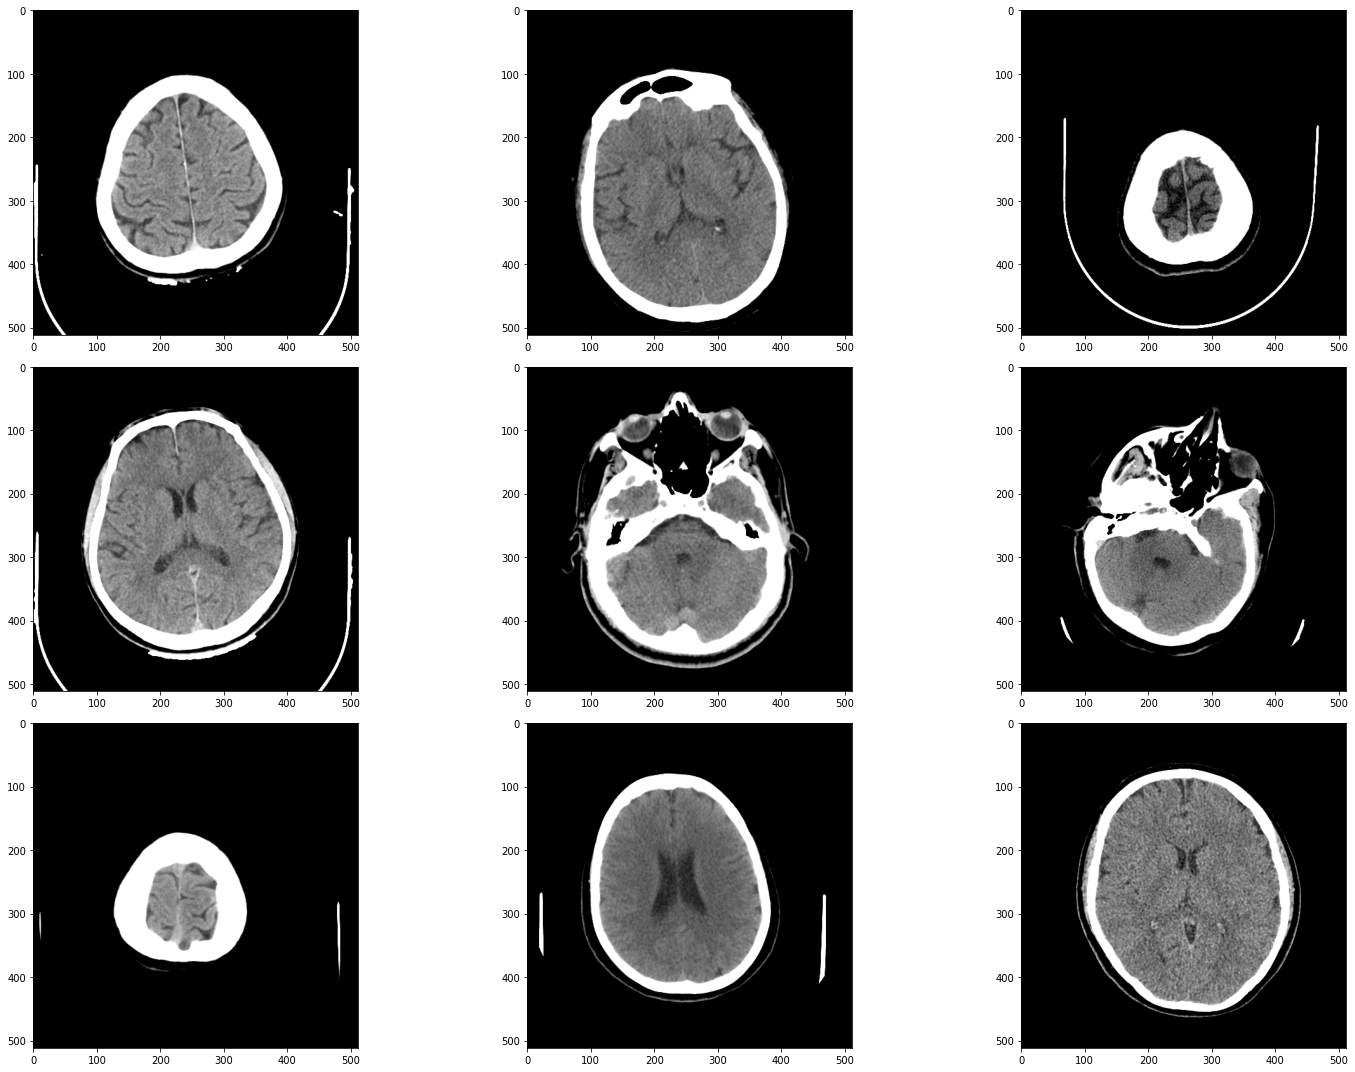

In [9]:
#ön işleme yapılmamış görüntüler
fig = plt.figure(figsize= (22,15))

for i in range(9):
    im = img_list3[i]
    fig.add_subplot(3,3,i+1)
    plt.imshow(im)
a = plt.tight_layout()

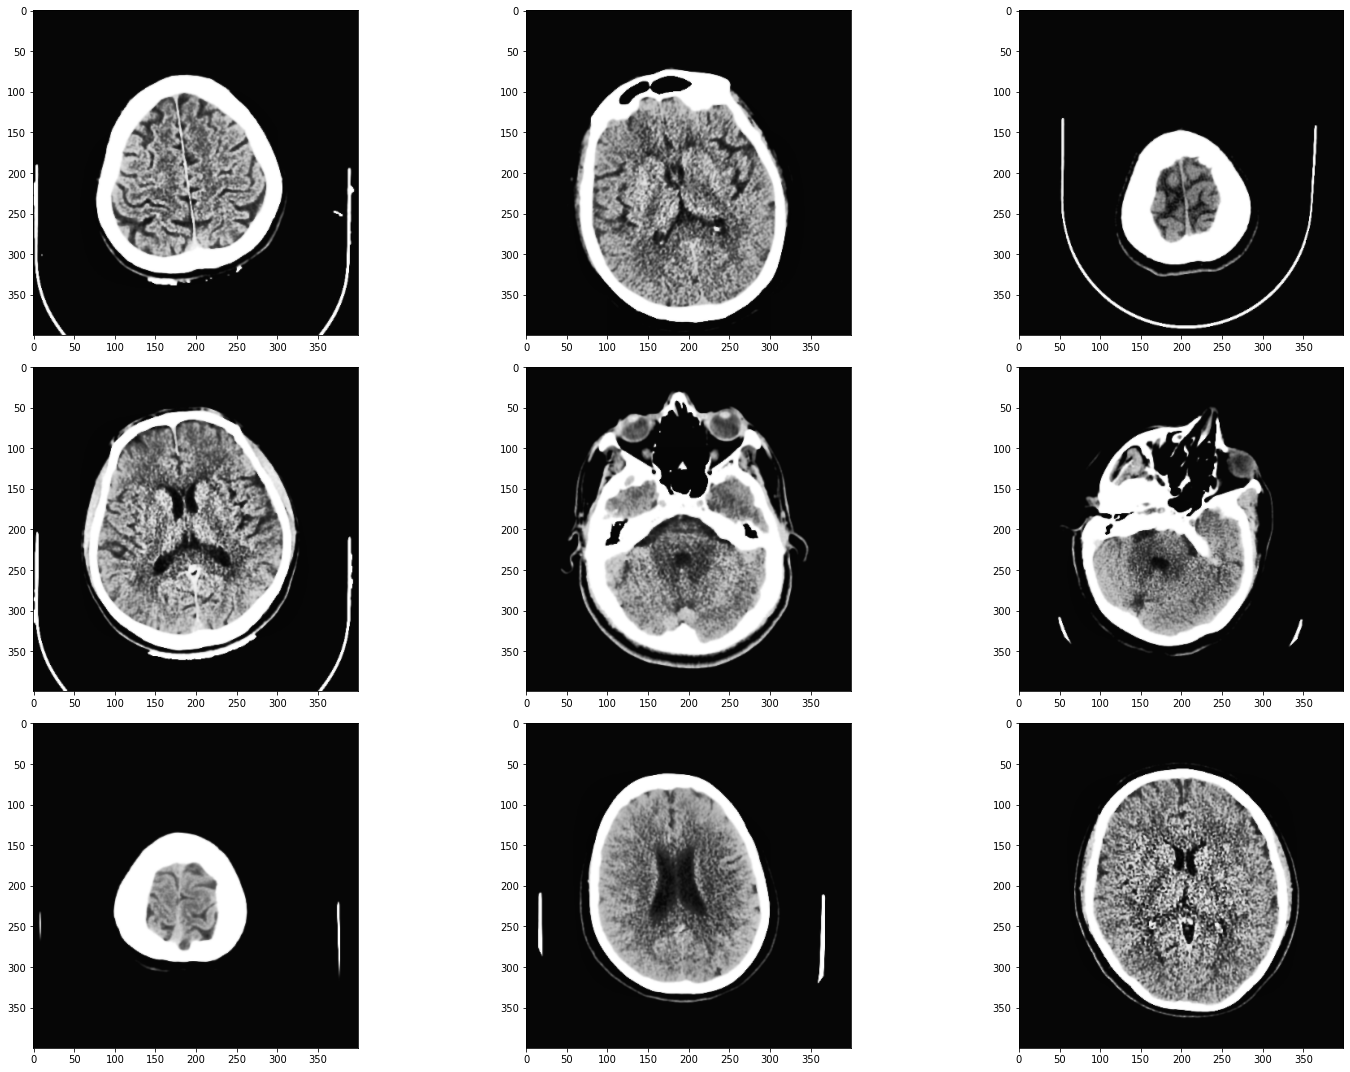

In [10]:
#Ön işleme  yapılmış görüntüler
fig = plt.figure(figsize= (22,15))

for i in range(9):
    im = img_list[i]
    fig.add_subplot(3,3,i+1)
    plt.imshow(im)
a = plt.tight_layout()